In [ ]:
#downloading the required packages
%pip install pandas
%pip install pandas_ta
%pip install numpy
%pip install matplotlib
%pip install statsmodels
%pip install pandas_datareader
%pip install datetime
%pip install yfinance
%pip install sklearn
%pip install PyPortfolioOpt

In [13]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')


sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')

symbols_list = sp500['Symbol'].unique().tolist()

symbols_list

end_date = '2025-01-21'
start_date = pd.to_datetime(end_date) - pd.DateOffset(365*10)
# df = yf.download(
#     tickers=symbols_list,
#     start=start_date,
#     end=end_date,
#     auto_adjust=False,   # <-- keep Adj Close
#     group_by='column'    # default, but explicit is nice
# ).stack()
# df.index.names = ['date', 'ticker']
# df.columns = df.columns.str.lower()
df


adj close       close        high         low        open  \
date       ticker                                                               
2015-01-26 A        35.902458   39.150002   39.169998   38.470001   38.790001   
           AAPL     25.097637   28.275000   28.590000   28.200001   28.434999   
           ABBV     40.729496   62.830002   63.040001   61.680000   62.259998   
           ABT      36.159981   44.150002   44.200001   43.419998   43.740002   
           ACGL     18.932390   19.910000   19.913334   19.623333   19.836666   
...                       ...         ...         ...         ...         ...   
2025-01-17 XYZ      86.959999   86.959999   88.150002   86.099998   87.000000   
           YUM     124.121735  125.320000  127.349998  125.190002  126.910004   
           ZBH     109.042999  109.559998  109.970001  108.470001  108.989998   
           ZBRA    405.709991  405.709991  407.290009  402.290009  406.040009   
           ZTS     164.284439  165.889999  169.669998  165.809998  168.899994   

                        volume  
date       ticker               
2015-01-26 A         1510900.0  
           AAPL    222460000.0  
           ABBV      8181100.0  
           ABT       4376200.0  
           ACGL      1662000.0  
...                        ...  
2025-01-17 XYZ       5797000.0  
           YUM       1604900.0  
           ZBH       1097100.0  
           ZBRA       270600.0  
           ZTS       4657200.0  

[1226482 rows x 6 columns]

<Axes: xlabel='date'>

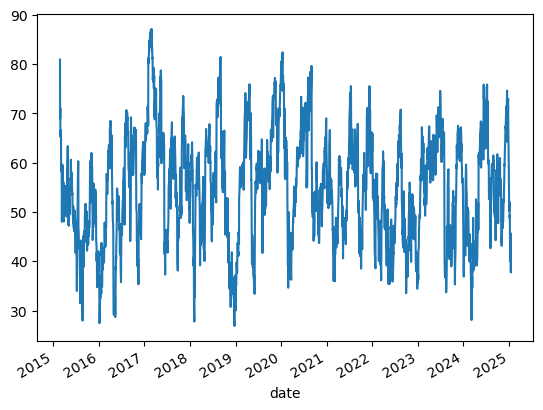

In [20]:
# calculate the Garman - Klass Volatility
# df['garman_klass_vol'] = ((np.log(df['high']) - np.log(df['low']))**2) / 2 - (2*np.log(2) - 1) * (np.log(df['adj close']) - np.log(df['open']))**2

# df['rsi'] = df.groupby(level = 1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))


df.xs('AAPL', level=1)['rsi'].plot()